In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("measures_v2.csv")
df.sample(5)

u_q    coolant  stator_winding         u_d  stator_tooth  \
1147276   63.183695  29.536737       50.453741  -63.877229     44.100734   
176979     7.662857  18.427233       38.876965   -5.410611     31.329836   
154879    23.646727  18.897253       39.513615  -22.066456     33.016571   
1004409   41.124874  26.410593       61.931851  124.129135     52.842801   
1149735  124.530553  29.709888       42.806622  -42.313468     39.456250   

         motor_speed         i_d         i_q         pm  stator_yoke  \
1147276  1499.987381  -43.512047  132.617559  34.897157    38.106849   
176979    100.016510  -43.512177  132.618378  28.786419    26.382143   
154879    499.992981  -43.512295  132.616776  35.716541    27.838772   
1004409  4236.158910 -175.813580 -102.638120  57.947948    42.778144   
1149735  3499.964863  -56.804544   32.292686  43.242177    36.187777   

           ambient      torque  profile_id  
1147276  25.694934  100.000000          42  
176979   21.629044  103.586464           3  
154879   23.201714  103.275139           7  
1004409  24.743695  -97.520210          73  
1149735  26.384441   25.000000          42

In [3]:
df.shape

(1330816, 13)

In [4]:
df_re_pro = df.drop(["profile_id"], axis=1)

In [5]:
df_re_pro.head()

u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197

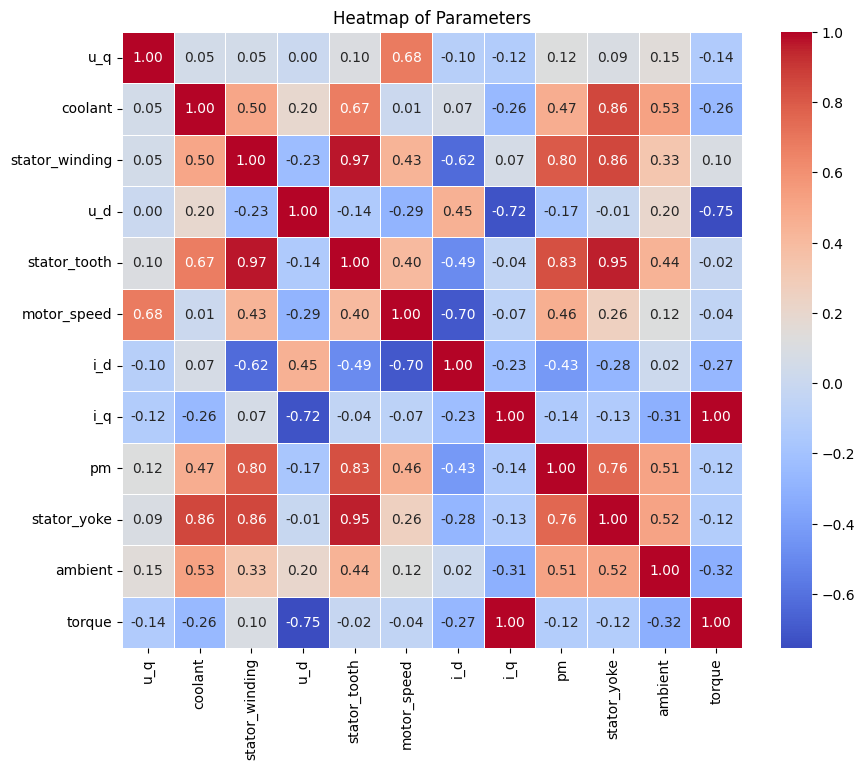

In [6]:
# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_df = df_re_pro.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of Parameters")
plt.show()

In [7]:
df_re_pro.describe()

u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.859663e+03  6.493323e+01  9.218188e+01  1.900150e+01  1.999100e+01   
min   -2.755491e+02 -2.780036e+02 -2.934268e+02  2.085696e+01  1.807669e+01   
25%    3.171107e+02 -1.154061e+02  1.095863e+00  4.315158e+01  3.199033e+01   
50%    1.999977e+03 -5.109376e+01  1.577401e+01  6.026629e+01  4.562551e+01   
75%    3.760639e+03 -2.979688e+00  1.006121e+02  7.200837e+01  6.146083e+01   
max    6.000015e+03  5.189670e-02  3.017079e+02  1.136066e+02  1.011480e+02   

            ambient        torque  
count  1.330816e+06  1.330816e+06  
mean   2.456526e+01  3.110603e+01  
std    1.929522e+00  7.713575e+01  
min    8.783478e+00 -2.464667e+02  
25%    2.318480e+01 -1.374265e-01  
50%    2.479733e+01  1.086035e+01  
75%    2.621702e+01  9.159718e+01  
max    3.071420e+01  2.610057e+02

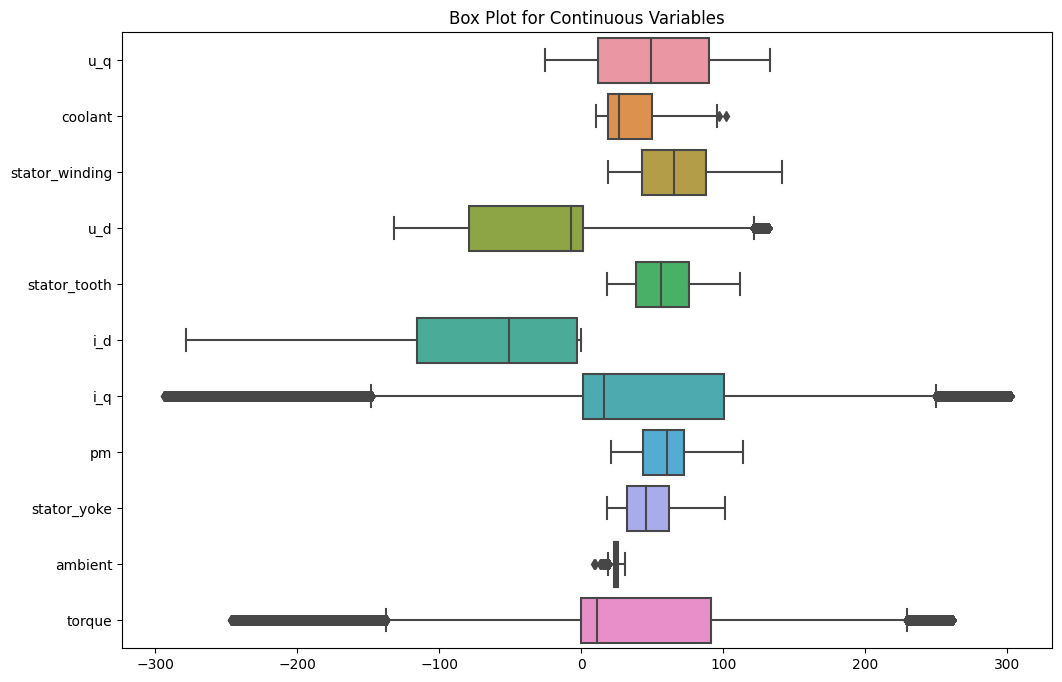

In [8]:
# Draw a box plot for all continuous variables in the sampled data
plt.figure(figsize=(12, 8))
sns.boxplot(df_re_pro.drop(['motor_speed'],axis=1), orient='h')
plt.title('Box Plot for Continuous Variables')
plt.show()

In [6]:
# Calculate z-scores for each column in the DataFrame
z_scores = np.abs((df_re_pro - df_re_pro.mean()) / df_re_pro.std())

# Define a threshold for z-score beyond which data points are considered outliers
threshold = 1.9

# Filter and keep only rows with z-scores less than the threshold for all columns
outlier_removed_data = df_re_pro[(z_scores < threshold).all(axis=1)]

# Now 'outlier_removed_data' contains the data with outliers removed

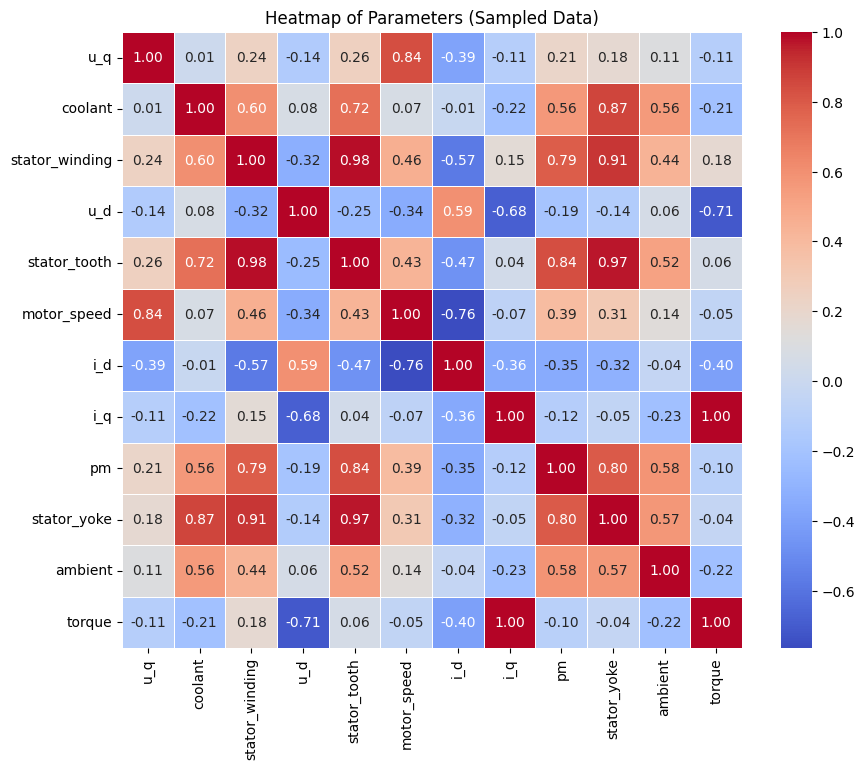

In [7]:
# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_df = outlier_removed_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of Parameters (Sampled Data)")
plt.show()

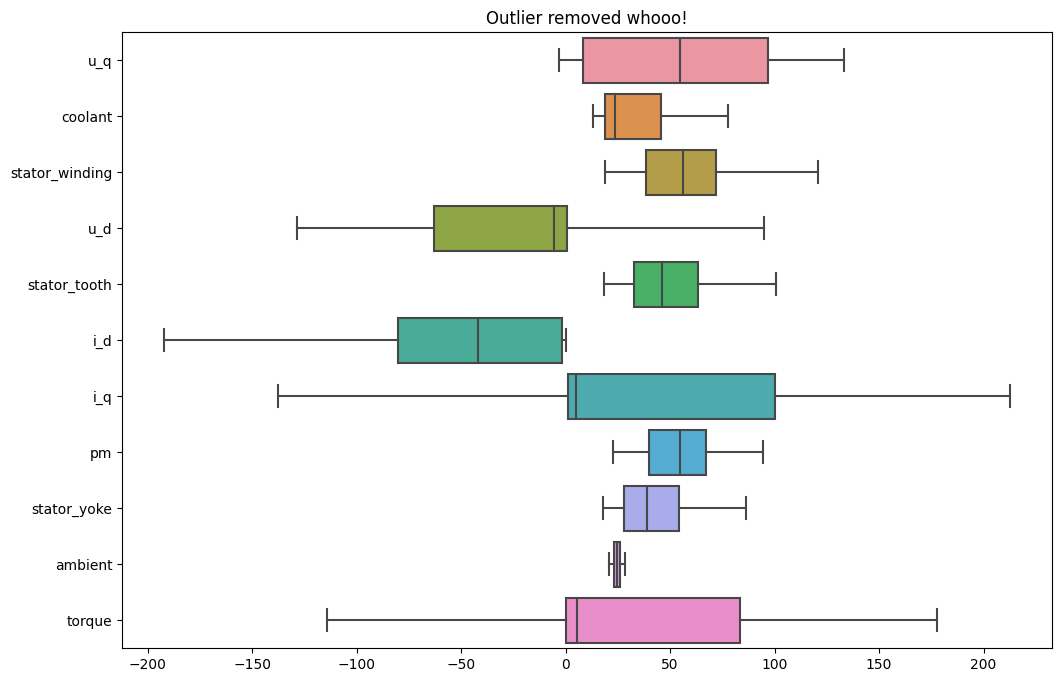

In [8]:
# Draw a box plot for all continuous variables in the sampled data
plt.figure(figsize=(12, 8))
sns.boxplot(outlier_removed_data.drop(['motor_speed'],axis=1), orient='h')
plt.title('Outlier removed whooo!')
plt.show()

In [18]:
# Save the DataFrame as a CSV file
outlier_removed_data.to_csv("outlier_removed_org.csv",index=False)

In [12]:
outlier_removed_data.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')

D:\Jupyter ipynb\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


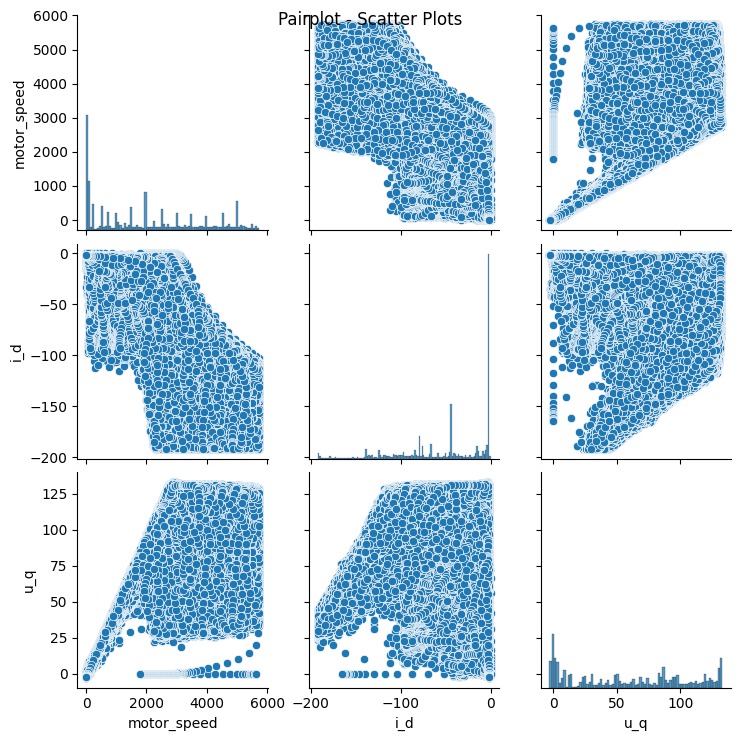

In [14]:
sns.pairplot(outlier_removed_data, vars=['motor_speed', 'i_d', 'u_q'])
plt.suptitle('Pairplot - Scatter Plots')
plt.show()

# Speed and Torque

In [10]:
# This data set contains Outliers
speed = df_re_pro.drop(["stator_winding","stator_tooth", "motor_speed","pm", "stator_yoke","ambient","coolant"], axis=1)
speed.sample(5)

u_q         u_d        i_d         i_q      torque
1007257  115.873672  -58.595239 -59.572924   48.457798   38.486669
309687    67.684006  113.434898 -91.367836 -149.470444 -127.540115
432733     4.696426   -1.815128 -15.495587   70.795486   52.447979
527700    51.196735  -59.289745 -50.733356  146.703659  114.825897
1096859  105.955977   77.198494 -91.077593  -60.465123  -52.721348

D:\Jupyter ipynb\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


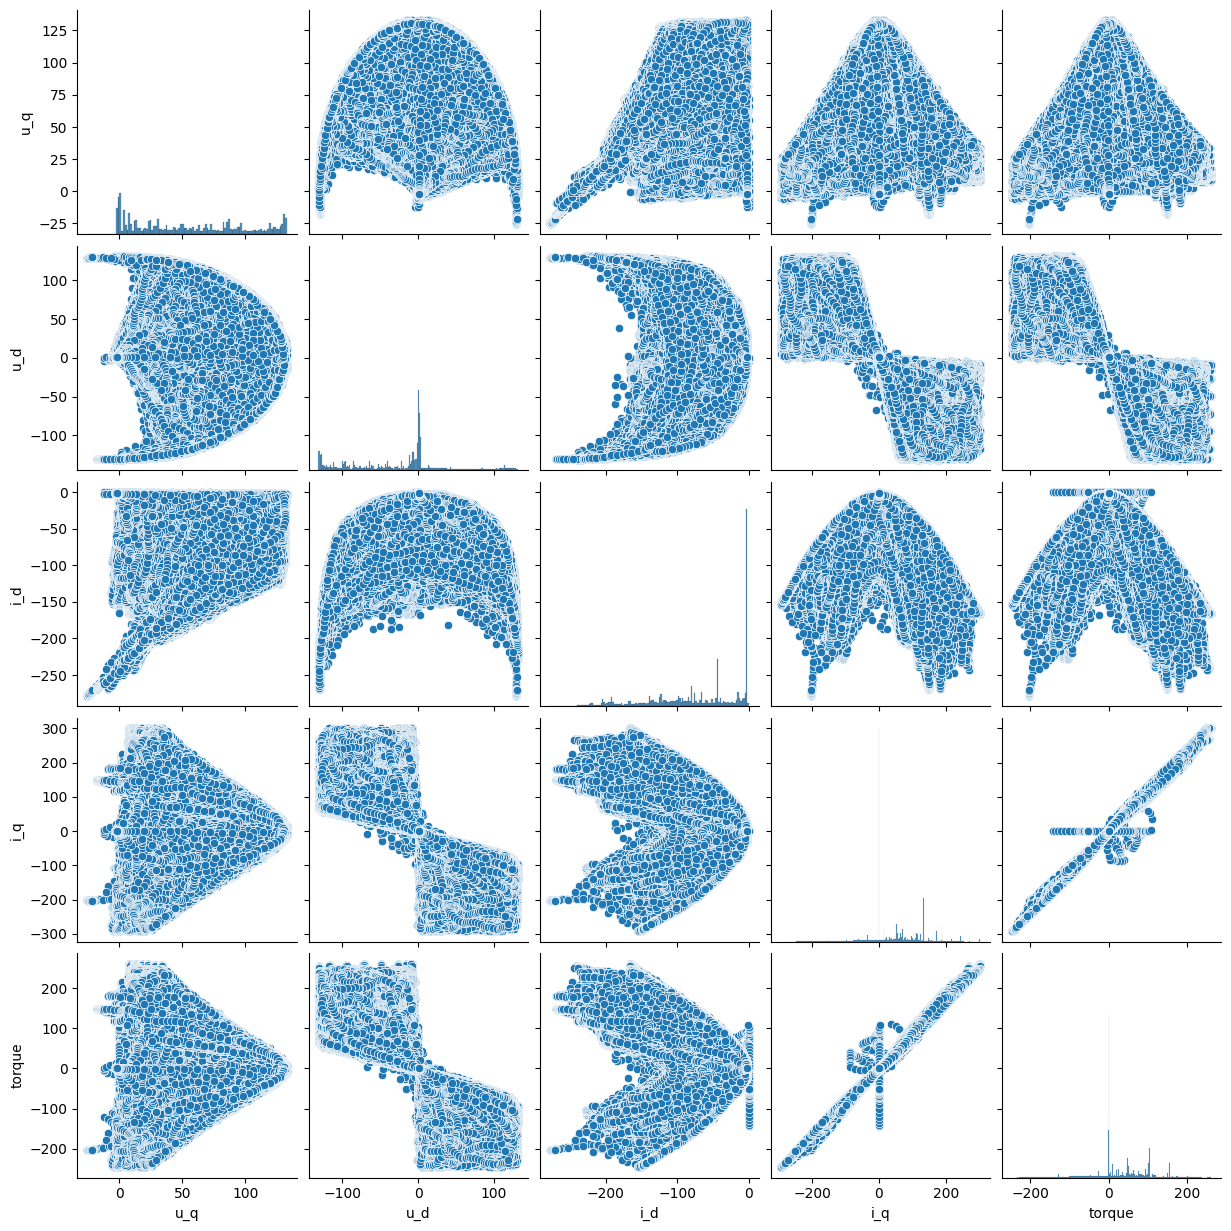

In [21]:
sns.pairplot(speed, kind="scatter")
plt.show()

In [11]:
# This Data set doen't contain any outliers
org = pd.read_csv("outlier_removed_org.csv")
speed_org = org.drop(["stator_winding","stator_tooth", "motor_speed","pm", "stator_yoke","ambient","coolant"], axis=1)
speed_org.sample(5)

u_q        u_d         i_d         i_q         torque
343725   4.696061  -1.808925  -15.494935   70.795448   5.247313e+01
772716  99.083622 -83.989549 -131.654904   41.936471   3.901652e+01
226760  85.913712 -98.789124 -132.442566   54.199421   4.765648e+01
341311  30.922607 -27.108810  -39.040009  120.302849   9.320221e+01
515622  -1.592965   2.265863   -2.001372    1.097564 -6.260455e-103

D:\Jupyter ipynb\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


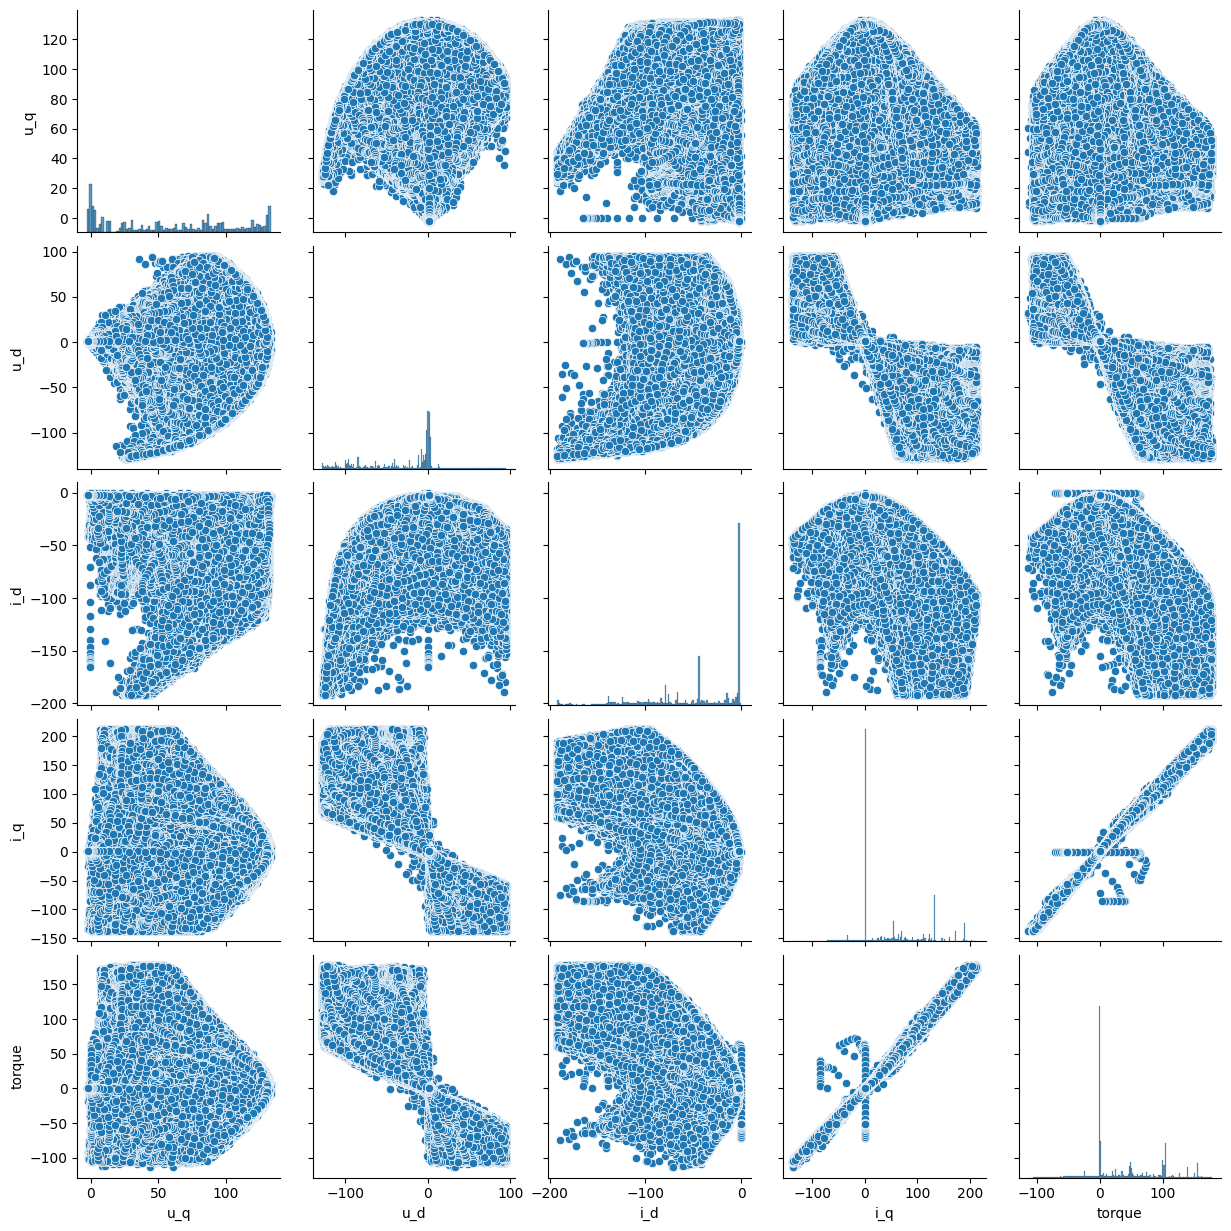

In [12]:
sns.pairplot(speed_org, kind="scatter")
plt.show()

We can clearly see torque and i_q linearly dependent to each other

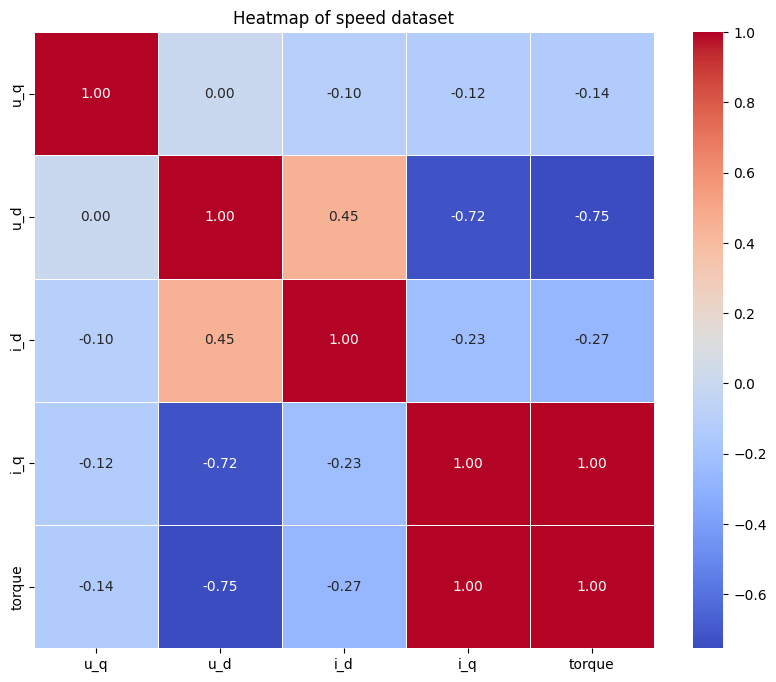

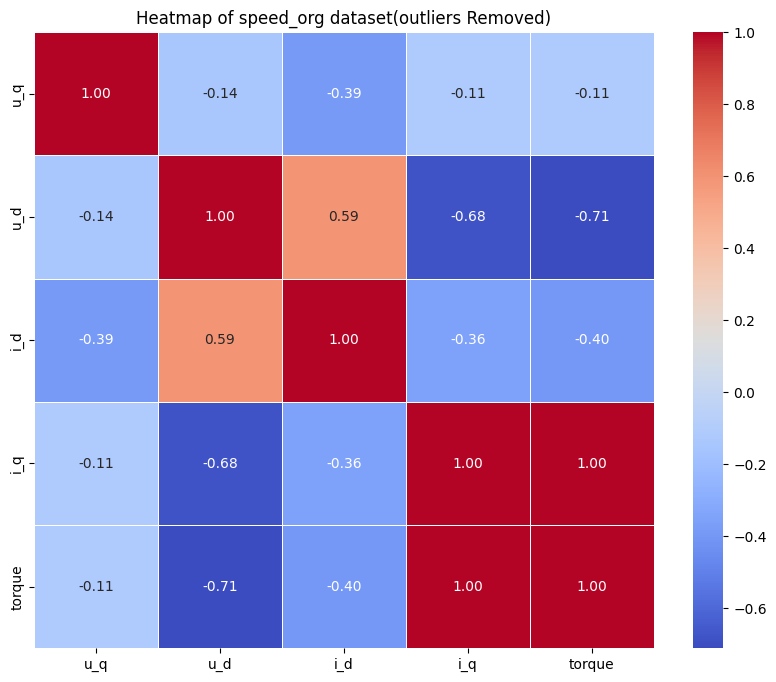

In [24]:
# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_speed = speed.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_speed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of speed dataset")


# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_speed = speed_org.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_speed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of speed_org dataset(outliers Removed)")
plt.show()

After removing outliers our dataset become more accurate

C:\Users\Aman\AppData\Local\Temp\ipykernel_26352\3082063572.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(speed_org['torque'], shade=True, label='speed_org')
C:\Users\Aman\AppData\Local\Temp\ipykernel_26352\3082063572.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(speed['torque'], shade=True, label='speed')


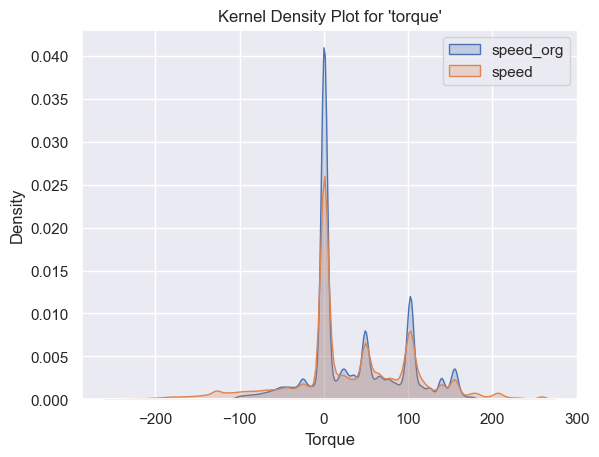

In [29]:
# Set the style to "darkgrid" (optional but provides a dark background grid for the plots)
sns.set(style="darkgrid")

# Make a default density plot using Seaborn's kdeplot for the 'torque' column in the 'speed_org' DataFrame
sns.kdeplot(speed_org['torque'], shade=True, label='speed_org')

# Make a default density plot using Seaborn's kdeplot for the 'torque' column in the 'speed' DataFrame
sns.kdeplot(speed['torque'], shade=True, label='speed')

# Add a legend to the plot
plt.legend()

plt.title("Kernel Density Plot for 'torque'")
plt.xlabel("Torque")
plt.ylabel("Density")
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_26352\115403223.py:5: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(speed_org['torque'], shade=True, label='speed_org', bw=0.5)
C:\Users\Aman\AppData\Local\Temp\ipykernel_26352\115403223.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(speed_org['torque'], shade=True, label='speed_org', bw=0.5)
C:\Users\Aman\AppData\Local\Temp\ipykernel_26352\115403223.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(speed['torque'], shade=True

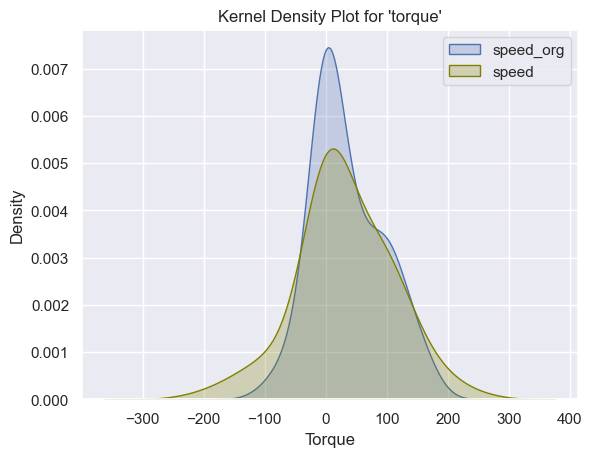

In [31]:
# Set the style to "darkgrid" (optional but provides a dark background grid for the plots)
sns.set(style="darkgrid")

# Make a default density plot using Seaborn's kdeplot for the 'torque' column in the 'speed_org' DataFrame
sns.kdeplot(speed_org['torque'], shade=True, label='speed_org', bw=0.5)

# Make a default density plot using Seaborn's kdeplot for the 'torque' column in the 'speed' DataFrame
sns.kdeplot(speed['torque'], shade=True, label='speed', bw=0.5, color="olive")

# Add a legend to the plot
plt.legend()

plt.title("Kernel Density Plot for 'torque'")
plt.xlabel("Torque")
plt.ylabel("Density")
plt.show()

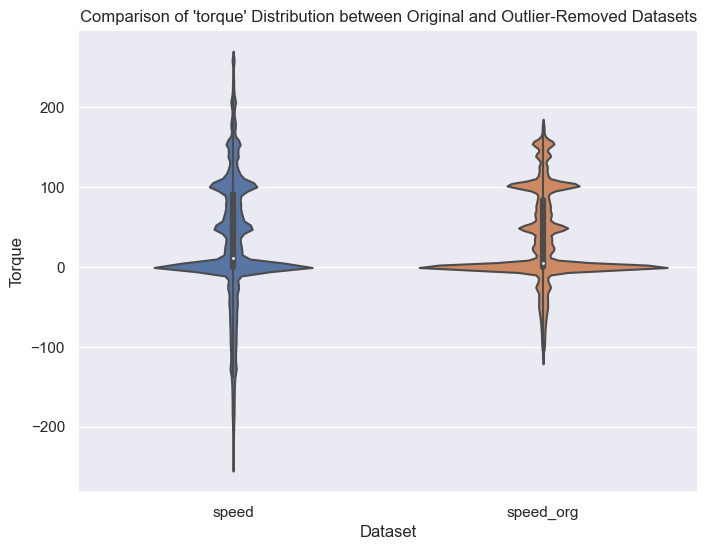

In [15]:
# Set the style to "darkgrid"
sns.set(style="darkgrid")

# Create a violin plot to compare 'torque' distributions between 'speed' and 'speed_org'
plt.figure(figsize=(8, 6))
sns.violinplot(x="Dataset", y="torque", data=pd.concat([speed.assign(Dataset="speed"), speed_org.assign(Dataset="speed_org")]))
plt.title("Comparison of 'torque' Distribution between Original and Outlier-Removed Datasets")
plt.xlabel("Dataset")
plt.ylabel("Torque")
plt.show()

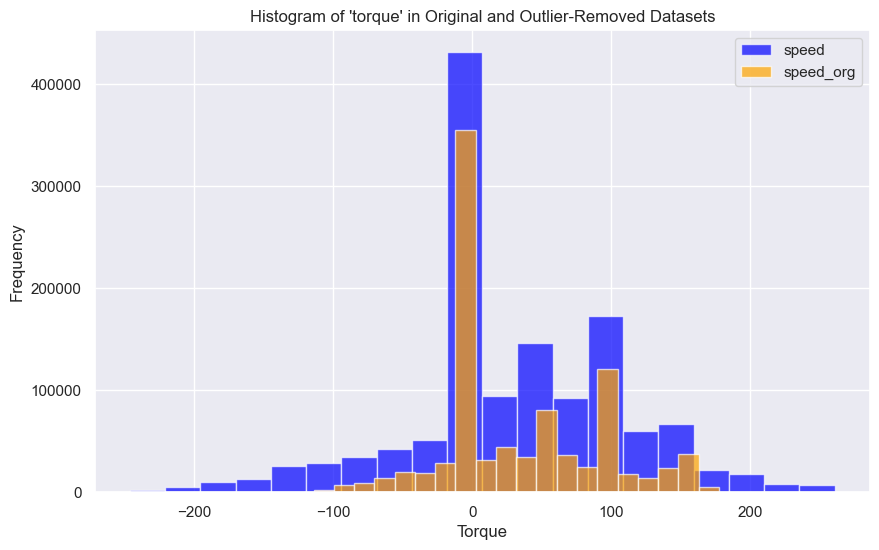

In [16]:
# Histograms for 'torque' in both datasets
plt.figure(figsize=(10, 6))
plt.hist(speed['torque'], bins=20, alpha=0.7, label='speed', color='blue')
plt.hist(speed_org['torque'], bins=20, alpha=0.7, label='speed_org', color='orange')
plt.xlabel("Torque")
plt.ylabel("Frequency")
plt.title("Histogram of 'torque' in Original and Outlier-Removed Datasets")
plt.legend()
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_11256\2957620701.py:9: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  fig = sns.kdeplot(speed_org['torque'], shade=True, color="r", bw=0.5, label='Torque')
C:\Users\Aman\AppData\Local\Temp\ipykernel_11256\2957620701.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(speed_org['torque'], shade=True, color="r", bw=0.5, label='Torque')
C:\Users\Aman\AppData\Local\Temp\ipykernel_11256\2957620701.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  fig = s

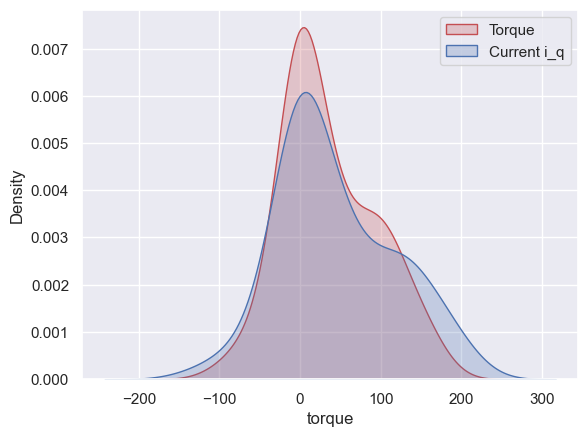

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'speed' and 'df' are your DataFrames containing the required data.

sns.set(style="darkgrid")

# Plotting both distributions on the same figure
fig = sns.kdeplot(speed_org['torque'], shade=True, color="r", bw=0.5, label='Torque')
fig = sns.kdeplot(speed_org['i_q'], shade=True, color="b", bw=0.5, label='Current i_q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

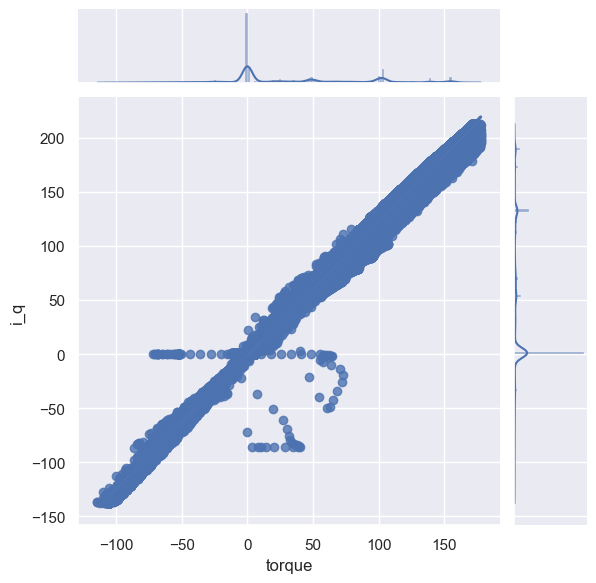

In [33]:
sns.jointplot(x = "torque", y = "i_q", data = speed_org, kind = 'reg')

In [37]:
speed_up = speed.join(df["motor_speed"])
speed_up.head()

u_q       u_d       i_d       i_q    torque  motor_speed
0 -0.450682 -0.350055  0.004419  0.000328  0.187101     0.002866
1 -0.325737 -0.305803  0.000606 -0.000785  0.245417     0.000257
2 -0.440864 -0.372503  0.001290  0.000386  0.176615     0.002355
3 -0.327026 -0.316199  0.000026  0.002046  0.238303     0.006105
4 -0.471150 -0.332272 -0.064317  0.037184  0.208197     0.003133

In [38]:
speed_up.isnull().sum()

u_q            0
u_d            0
i_d            0
i_q            0
torque         0
motor_speed    0
dtype: int64

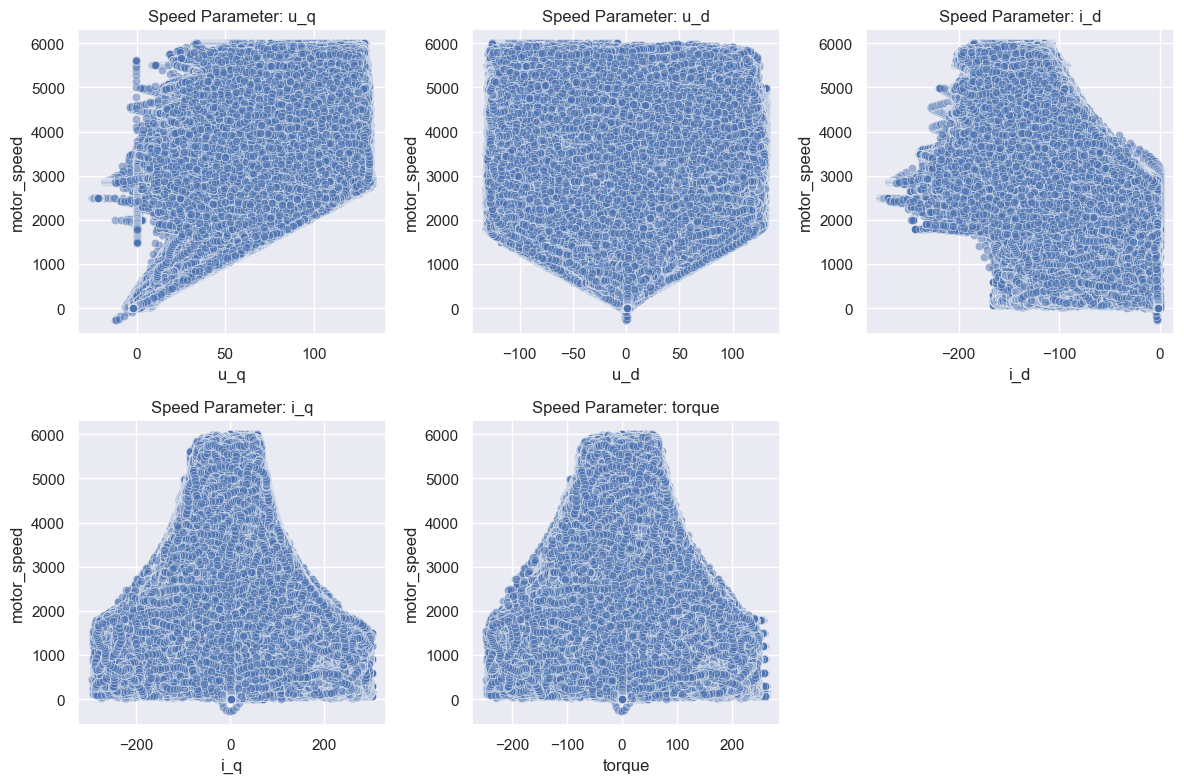

In [39]:
# Create a figure and set the size
plt.figure(figsize=(12, 8))

# Define the number of subplots (number of speed parameters)
num_subplots = 5

# Loop through each speed parameter and create a scatter plot in a subplot
for i, speed_param in enumerate(['u_q', 'u_d', 'i_d', 'i_q', 'torque']):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, i+1 indicates the subplot number
    sns.scatterplot(data=speed_up, x=speed_param, y='motor_speed', alpha=0.5)
    plt.title(f'Speed Parameter: {speed_param}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot for Continuous Variables')

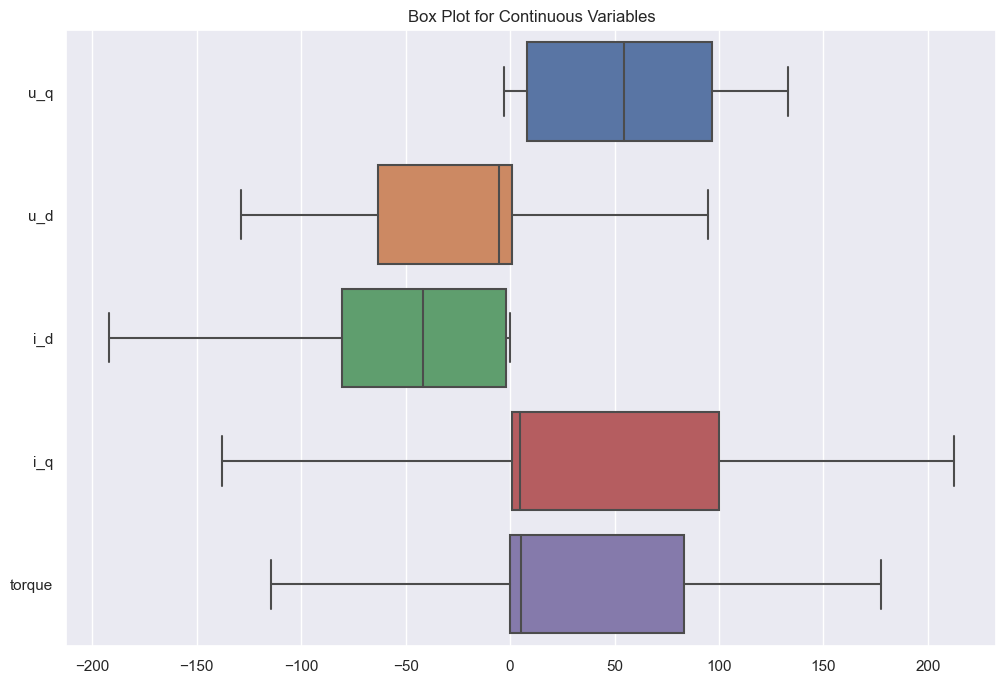

In [44]:
# Draw a box plot for all continuous variables in the sampled data
plt.figure(figsize=(12, 8))
sns.boxplot(speed_org, orient='h')
plt.title('Box Plot for Continuous Variables')

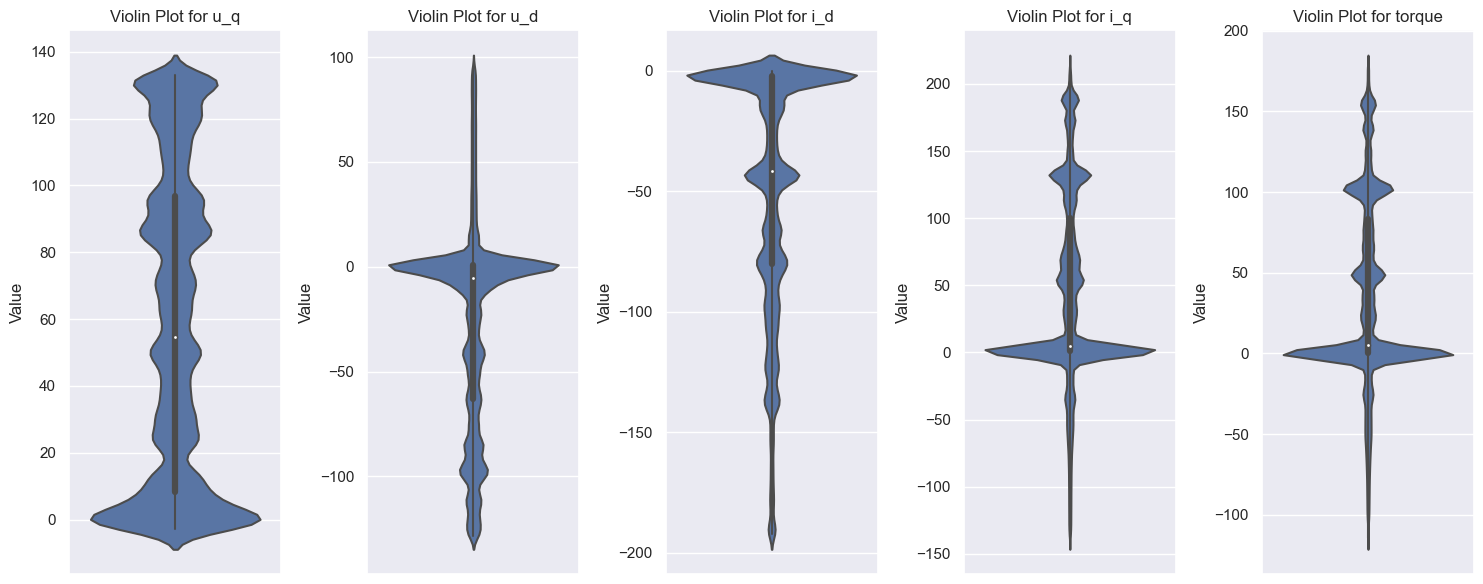

In [45]:
# Get the list of column names containing continuous variables
continuous_cols = ['u_q', 'u_d', 'i_d', 'i_q', 'torque']

# Calculate the number of subplots needed
num_subplots = len(continuous_cols)

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(15, 6))

# Loop through each column and draw a violin plot
for i, column in enumerate(continuous_cols):
    sns.violinplot(data=speed_org, y=column, ax=axes[i])
    axes[i].set_title(f'Violin Plot for {column}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Temperature

In [48]:
temp = org.drop(["u_q","u_d", "i_d","i_q", "torque","motor_speed"], axis=1)
temp.head()

coolant  stator_winding  stator_tooth         pm  stator_yoke    ambient
0  19.310339       46.627861     37.219505  35.045197    27.430012  20.899378
1  19.312284       46.660896     37.326965  35.090080    27.474701  21.009548
2  19.303518       46.493481     37.351593  35.137783    27.520298  21.024719
3  19.265827       46.390057     37.405773  35.175957    27.596558  21.067995
4  19.215105       46.461845     37.428577  35.237061    27.663696  21.140137

D:\Jupyter ipynb\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


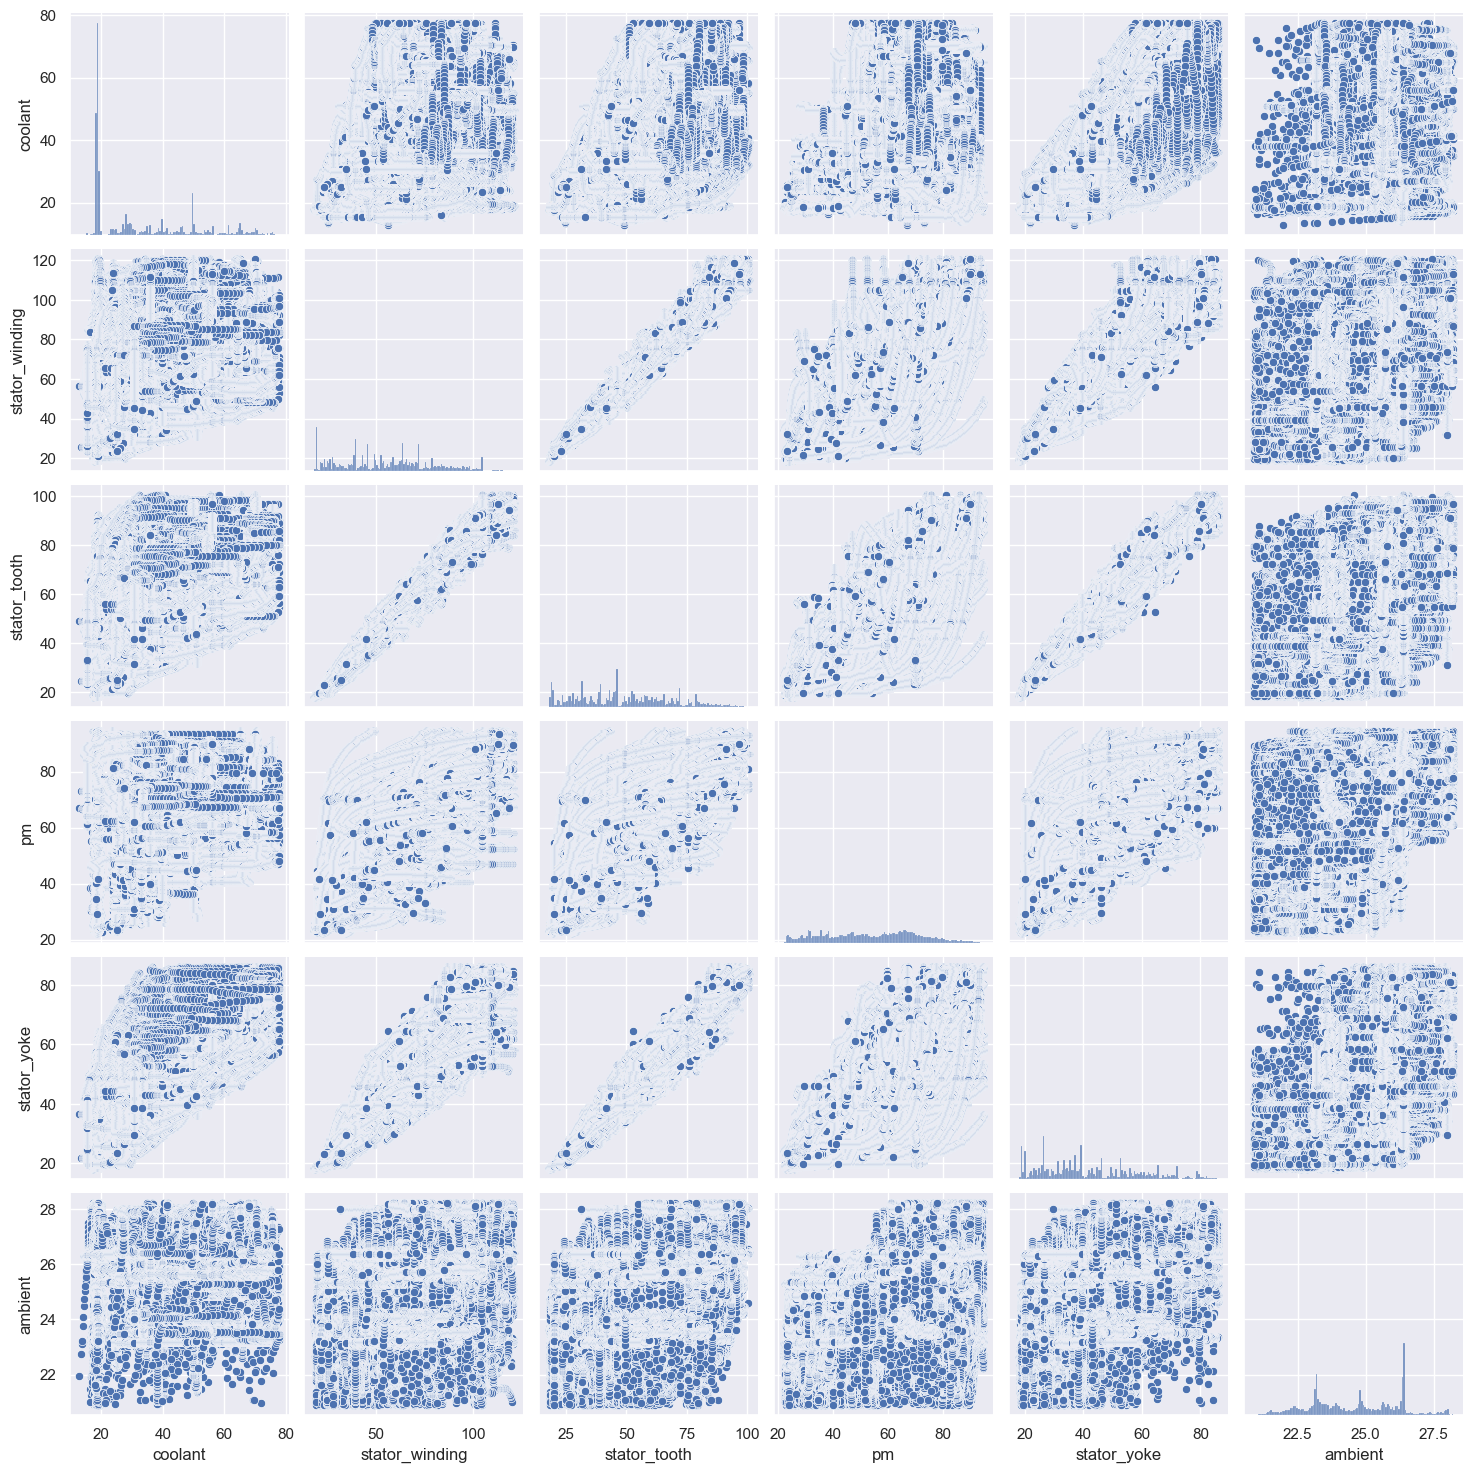

In [49]:
sns.pairplot(temp, kind="scatter")
plt.show()

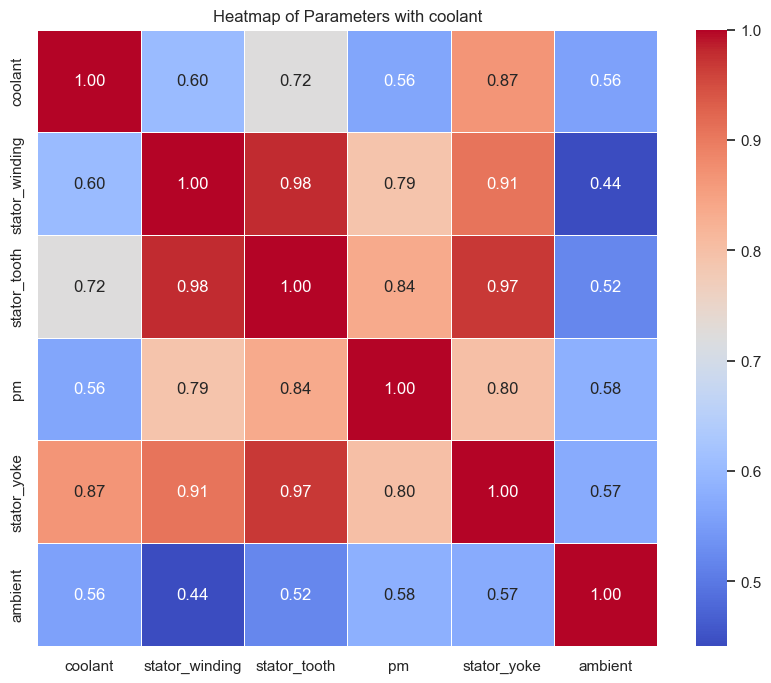

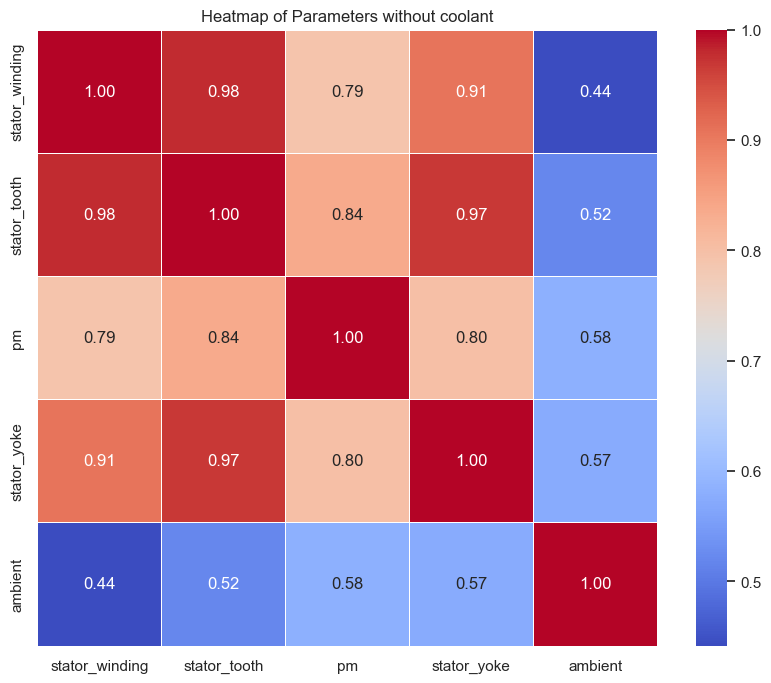

In [54]:
# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_temp_with_cool = temp.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_temp_with_cool, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of Parameters with coolant")

# Calculate the correlation matrix between parameters for the sampled data
correlation_matrix_temp = temp.drop(columns= ['coolant']).corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_temp, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of Parameters without coolant")


plt.show()

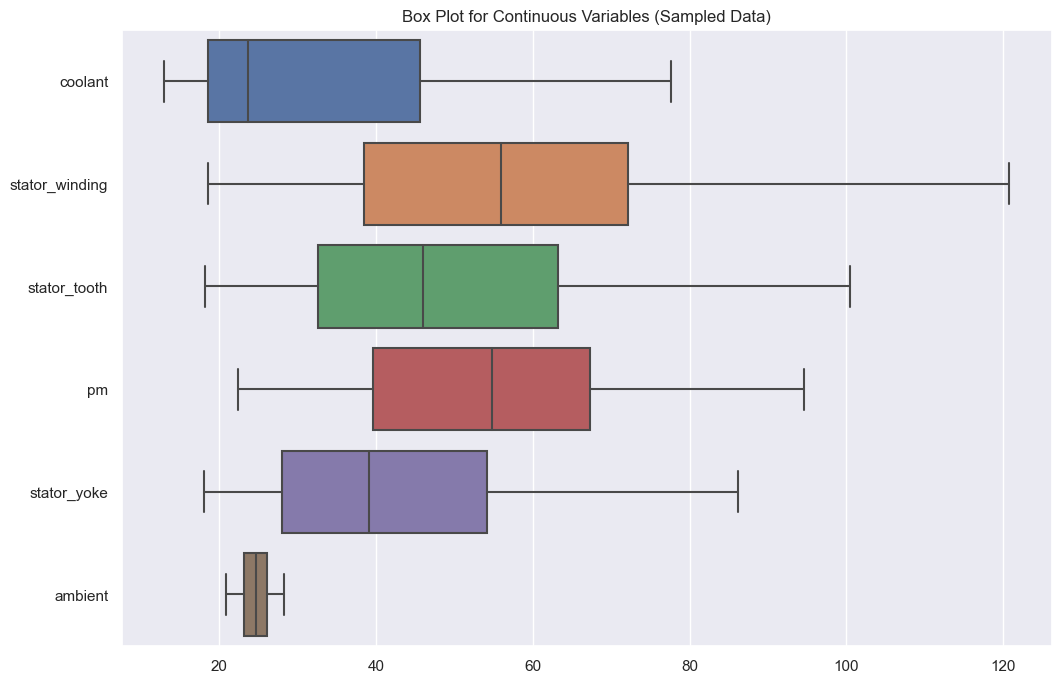

In [55]:
# Draw a box plot for all continuous variables in the sampled data
plt.figure(figsize=(12, 8))
sns.boxplot(temp, orient='h')
plt.title('Box Plot for Continuous Variables (Sampled Data)')
plt.show()

So we Vizualize everything 

from these plots we can understand:-
* which parameters are more important and which is not
* How parameters are corelated 
* Using Box-Plot we removed outliers  